<a href="https://colab.research.google.com/github/devdinie/McMedhacks_MRIs-and-GANs/blob/main/Assignment_6_Part_1_Intro_to_MRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Magnetic Resonance Imaging (MRI)

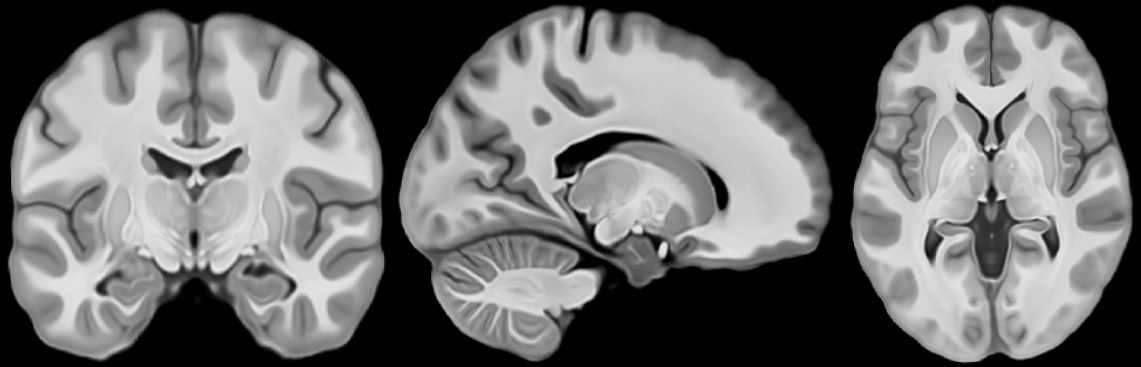

[Average T1w MRI from N=990 human subjects](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7492465/)

**Outline**
*   Introduction to MRI
  *   [Why MRI?](https://colab.research.google.com/drive/1KSTTN2wblSxLIhxCf1jyfSuSjL2TPboZ#scrollTo=fEjW-gC7ocp3)
  *   [MRI Data Analysis](https://colab.research.google.com/drive/1KSTTN2wblSxLIhxCf1jyfSuSjL2TPboZ#scrollTo=JYWq9zSJfebf&line=9&uniqifier=1)
  *   [Back to the Basics: How Does it Work?](https://colab.research.google.com/drive/1KSTTN2wblSxLIhxCf1jyfSuSjL2TPboZ#scrollTo=cUUiCbEptsz2)

*   [Structural MRI (sMRI)](https://colab.research.google.com/drive/1KSTTN2wblSxLIhxCf1jyfSuSjL2TPboZ#scrollTo=hLoDArUrQKsW)
  *   [Initialization](https://colab.research.google.com/drive/1KSTTN2wblSxLIhxCf1jyfSuSjL2TPboZ#scrollTo=xcq1AI9Fkbsu)
  *   [Reading T1w and T2w images](https://colab.research.google.com/drive/1KSTTN2wblSxLIhxCf1jyfSuSjL2TPboZ#scrollTo=pTR_YDp-krUG)
  *   [Visualizing T1w and T2w images](https://colab.research.google.com/drive/1KSTTN2wblSxLIhxCf1jyfSuSjL2TPboZ#scrollTo=FgGr60KJL0eT)
  *   [Commonly used file formats](https://colab.research.google.com/drive/1KSTTN2wblSxLIhxCf1jyfSuSjL2TPboZ#scrollTo=Yf-48hHsSZMq)
      * [NIFTI vs. MINC, a Contentious Debate](https://colab.research.google.com/drive/1KSTTN2wblSxLIhxCf1jyfSuSjL2TPboZ#scrollTo=r7OtbJbYoP-t)
  *   [Data preprocessing](https://colab.research.google.com/drive/1KSTTN2wblSxLIhxCf1jyfSuSjL2TPboZ#scrollTo=IKDvmeLQh-vj&line=1&uniqifier=1)
      * [Intensity normalization](https://colab.research.google.com/drive/1KSTTN2wblSxLIhxCf1jyfSuSjL2TPboZ#scrollTo=VurU0_nOy_z7&line=1&uniqifier=1)
      * [Brain extraction (skull stripping)](https://colab.research.google.com/drive/1KSTTN2wblSxLIhxCf1jyfSuSjL2TPboZ#scrollTo=YO20bVqH7jd6&line=3&uniqifier=1)
  *   [Simple segmentation Example](https://colab.research.google.com/drive/1KSTTN2wblSxLIhxCf1jyfSuSjL2TPboZ#scrollTo=mKErEGNCPwpJ)
      * [Visualizing regions of interests ROIs](https://colab.research.google.com/drive/1KSTTN2wblSxLIhxCf1jyfSuSjL2TPboZ#scrollTo=nZNB9RBzMPcL)

## Why MRI?

*   In vivo;
*   Non-invasive and safe (no radioactivity!);
* Very high spatial resolution;
* Versatility: basic image acquisition protocols can be adapted to acquire different types of information. Some examples include:
    - **functional MRI (fMRI)** captures information about blood oxygenation levels as a function of time and space;
    - **magnetic resonance spectroscopy imaging (MRSI)** gives you information about the concentrations of specific chemicals as a function of time and space;
    - **diffusion-weighted MRI (dwMRI)** gives you information about the diffusion of water molecules as a function of space.

## MRI Data Analysis

* Example populations under study:
    - diseased vs. healthy controls;
    - development & aging;
    - different species (ex: mice, rats, non-human primates, etc).
* Many large and open-source databases available (ex: [Human Connectome Project](http://www.humanconnectomeproject.org), [UK BioBank](https://www.ukbiobank.ac.uk)) allow for the implementation of sophisticated statistical models.
* Examples of machine learning applications:
    - Unsupervised learning
        - Ex: independant component analysis (ICA) to denoise fMRI time-series data;
        - Ex: principal component analysis (PCA) for dimensionality reduction to facilitate downstream analyses;
        - Ex: canonical correlation analysis (CCA) or partial least squares correlation (PLSC) analysis to extract latent spatial components.
    - Supervised learning
        - Ex: classification or regression tasks, such as predicting a subject's age based on their brain anatomy;

* And finally... a list of some perennial **deep learning** challenges in the field:
    - anatomical structure segmentation;
    - generation of T2w images from T1w images (see below);
    - generation of high-resolution images from low-resolution images.

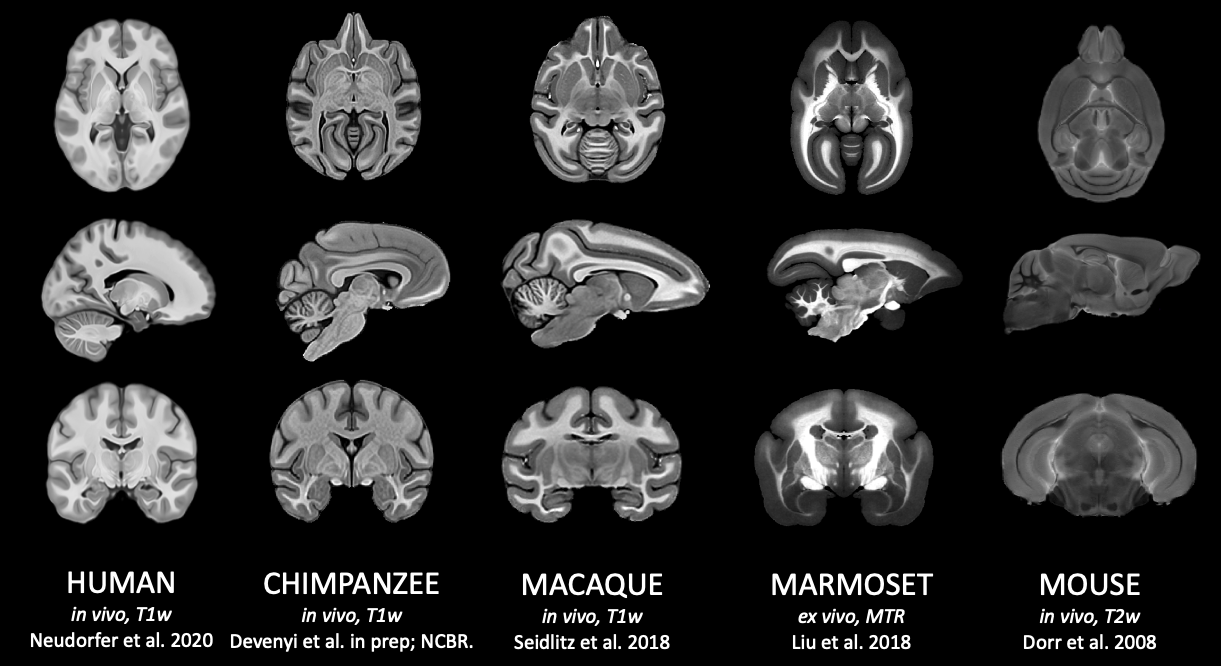

Example of MR images from different species. Slide from a talk given by Nadia Blostein, 08-07-2021.

## Back to the Basics: How Does It Work?

Your body is made of protons (found in water!) that spin at a certain frequency, which is why protons are often referred to as **spins** in the field of MR physics. 

When a body is placed inside a MRI scanner, a static magnetic field, **B0**, is applied in order to align all the spins in the body **with each other and with the magnetic field B0**. While B0 remains on, a second magnetic field, **B1**, is transiently applied via **radiofrequency (RF) pulse**. This temporarily destabilizes the spins. Since B1 is transient but B0 is tonic, the spins gradually **realign with each other and with B0**. What is being measured during the acquisition of a MR image is both the rate at which spins realign with B0 (**T1 relaxation**, also known as **longitudinal relaxation** or **spin-lattice relaxation**) and the rate at which spins realign relative to each other (**T2 relaxation**, also known as **tranverse relation** or **spin-spin relaxation**). 

Depending on the molecular environment of a spin, its T1 and T2 relaxation rates will vary, which is what allows us to measure tissue content in a body with a very high spatial resolution. For instance, liquids have a long T1 and T2, whereas fat has a short T1 and shorter T2 than water. 

In practise, when acquiring a MRI, you can manipulate different properties of the RF pulses (ex: duration, quantity, flip angle) in order to measure slightly different physical properties of the tissue of interest. This is what is called an **imaging sequence**. One of the most commonly used imaging sequences is the **spin-echo sequence**, characterized by the application of one 90-degree RF pulse, followed by a second 180-degree RF pulse. The way that you time these pulses determines the image acquisition **repetition time (TR; impacts T1 relaxation)** and **echo time (TE; impacts T2 relaxation)**, which will in turn determine what imaging modality you will acquire. Three canonical spin-echo sequence modalities are **T1-weighted (T1w)**, **T2-weighted (T2w)** and **proton density-weighted (PDw)** images. These are all examples of **structural MRI (sMRI)**.

### To learn more about MR Physics:
* [Dr. Michael Lipton's Albert MRI course](https://www.youtube.com/watch?v=35gfOtjRcic) (Einstein College of Medicine)contains some of the most intuitive explanations;
* [MRI Made Easy PDF](https://rads.web.unc.edu/wp-content/uploads/sites/12234/2018/05/Phy-MRI-Made-Easy.pdf);
* [Talk](https://slideplayer.com/slide/3279608/) by John VanMeter
* A few resources on [MR Image Encoding](http://mri-q.com/uploads/3/4/5/7/34572113/imageencoding_mit_courseware_wald.pdf) (not mentioned in this notebook)
    * [Signal and Spatial Frequency](http://www.mri-q.com/why-signal-harr-k-space.html)
    *[FOV and k-space](https://mriquestions.com/field-of-view-fov.html)
    * [A Perspective on K-Space](http://mri-q.com/uploads/3/4/5/7/34572113/fourier.kspace.mezrich.1995.pdf)

## Handling Structural MR Images (sMRI)

In [spin-echo](https://en.wikipedia.org/wiki/Spin_echo) (SE) imaging, the repetition time (TR) and the echo time (TE) are used to control image contrast and the "weighting" of the MR image. 
*  A short TR and short TE will result in a T1 weighted (T1w) image
*  A long TR and long TE will result in a T2 weighted (T2w) image 
* Note: do not confuse a T1w image with a T1 image or a T2w image with a T2 image. T1 and T2 images are **quantitative MR** images, a topic that we will not be going over.
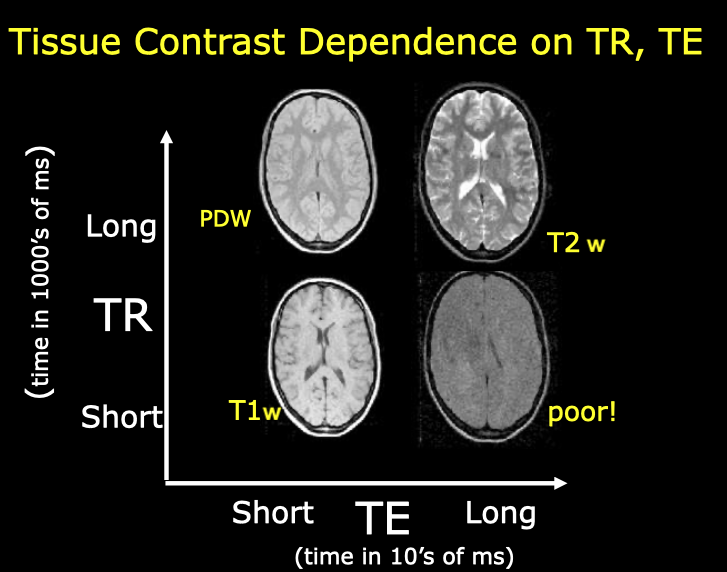

Image from [here](https://slideplayer.com/slide/3279608/).

## Initialization

Required python packages:
*   [nibabel](https://nipy.org/nibabel/)
*   [numpy ](https://numpy.org/)
*   [nilearn](https://nilearn.github.io/index.html)
*   [matplotlib](https://matplotlib.org/)
*   [nipype](https://nipype.readthedocs.io/en/latest/api/generated/nipype.interfaces.fsl.html)

Python packages that have not been installed can be installed using: ```!pip install <package-name> ```
For example: ```!pip install nipype```

In [ ]:
!pip install nilearn
!pip install nipype

  Using cached nilearn-0.8.0-py3-none-any.whl (4.9 MB)
     |████████████████████████████████| 14.8 MB 200 kB/s 
     |████████████████████████████████| 9.5 MB 48.5 MB/s 
     |████████████████████████████████| 3.3 MB 44.6 MB/s 
     |████████████████████████████████| 25.9 MB 1.4 MB/s 
     |████████████████████████████████| 303 kB 48.1 MB/s 
     |████████████████████████████████| 22.2 MB 80.9 MB/s 
     |████████████████████████████████| 40 kB 4.8 MB/s 
     |████████████████████████████████| 67 kB 5.5 MB/s 
     |████████████████████████████████| 247 kB 55.5 MB/s 
     |████████████████████████████████| 510 kB 54.6 MB/s 


  Using cached nipype-1.6.1-py3-none-any.whl (3.2 MB)
  Using cached prov-2.0.0-py3-none-any.whl (421 kB)
     |████████████████████████████████| 5.1 MB 6.2 MB/s 
  Using cached etelemetry-0.2.2-py3-none-any.whl (6.2 kB)
     |████████████████████████████████| 1.6 MB 42.0 MB/s 
     |████████████████████████████████| 128 kB 64.0 MB/s 
  Using cached rdflib-5.0.0-py3-none-any.whl (231 kB)
     |████████████████████████████████| 97 kB 6.7 MB/s 
  Using cached ci_info-0.2.0-py3-none-any.whl (6.9 kB)
     |████████████████████████████████| 6.3 MB 18.5 MB/s 
  Using cached isodate-0.6.0-py2.py3-none-any.whl (45 kB)


**Sample data**

Two sample images from the [SIMON dataset](http://fcon_1000.projects.nitrc.org/indi/retro/SIMON.html) are included in the folder ```data/data_part1```: ```sub-032633_T1w.nii.gz``` and ```sub-032633_T2w.nii.gz```.

First, make sure you have mounted your drive ("mount drive", after clicking the folder icon on the left), enabling access to google drive folders.

Run the following code to work with the provided images.

In [ ]:
import os
import shutil

if os.path.exists('McMedHacks_Week6_Data'):
  shutil.rmtree('McMedHacks_Week6_Data')
!git clone https://github.com/devdinie/McMedhacks_MRIs-and-GANs.git

INPUT_DIR='McMedhacks_MRIs-and-GANs/data/data_part_1'
OUTPUT_DIR = 'assignment_part1_output'
if os.path.exists(OUTPUT_DIR):
  shutil.rmtree(OUTPUT_DIR)
os.mkdir(OUTPUT_DIR)

In [ ]:
import nibabel as nib
import numpy   as np
import nilearn

from nilearn import plotting
from nilearn import datasets

##Reading T1w and T2w images

In [ ]:
# Load T1w image 
t1w_img=nib.load('McMedhacks_MRIs-and-GANs/data/data_part1/sub-032633_T1w.nii.gz')

# Display image shape 
print("T1w shape:", t1w_img.shape)

# Read image data as array 
t1w_data = t1w_img.get_fdata()

# Find maximum value (intensity)
t1w_max = np.max(t1w_data)
print("T1w max intensity value:",t1w_max)

📌 What is the minimum intensity value of the T1w image?

📌 Do the following for the T2w image ```sub-032633_T1w.nii.gz```:

1.   Load the T2w image;
2. Print the image shape;
3.   Get data array;
4. Find minimum and maximum intensity values.

## Visualizing T1w and T2w images

In [ ]:
plotting.plot_anat(t1w_img, title="T1w image",dim=-1)

What you observe is a single slice from three views: coronal (left), Sagittal (middle), axial (right).

📌 Change the value for "dim" by refering to parameter descriptions [here](https://nilearn.github.io/modules/generated/nilearn.plotting.plot_anat.html). What changes do you observe?

📌 Can you display the T2w image?

📌 What differences can you visually observe between T1w and T2w images?

##Commonly used File Formats

### NIFTI vs. MINC, a Contentious Debate
* For data analysis purposes, **DICOM files (.dcm)** are usually converted to **NIfTI (.nii, .nii.gz)** or **MINC (.mnc)** format. To the few people in the world who have a strong opinion on which file format between NIfTI and MINC is better, this is a very contentious topic. Although NIFTI files have won the popularity contest (for better or for worse), it is fairly straightforward to do conversions from one file format to the other.
* NIFTI files can break during the transfer from one server to another, so it is always good practise to make sure that your files have remained intact. You can do this by either comparing hashes (e.g. [md5sum](https://www.unix.com/shell-programming-and-scripting/244087-compare-files-directories-md5sum.html)) or by typing ```PrintHeader filename.nii.gz``` into your command line. 
* The information of your MR image is stored as intensity values (which have no actual unit) in a 3D coordinate system. Your space is encoded as the size of your 3 dimensions (x, y, z), the direction of the cosine angles between axes (ie how the grid of data maps to real-world space), the spacing between each 3D pixel (a **voxel**) and the coordinates of the origin.
* Speaking of **space**, it is always important for your images to be located in the coordinate space (ex: [MNI space](https://brainmap.org/training/BrettTransform.html)).

##Data Preprocessing

Data preprocessing is important because it prepares data in meaningful way to facilitate downstream analyses. Some examples of preprocessing tasks include normalization, feature extraction, and dimensionality reduction.

Two of the most commonly performed preprocessing steps in neuroscience are intensity normalization and brain extraction (also known as skull stripping). We will walk you through them below.

Here, we have used [ANTS](http://stnava.github.io/ANTs/) for intensity normalization (N4 correction) through [nipype ANTs interface](https://nipype.readthedocs.io/en/latest/api/generated/nipype.interfaces.ants.html).
Note: You will have to install ANTSPyX. This can be done using ``` !pip install antspyx ```

####Tools for MRI preprocessing

Commonly used tool include FSL, ANTs, FreeSurfer etc. These are also made available through nipype.interfaces.

#####**Advanced Normalization Tools** [(ANTs)](https://github.com/ANTsX/)

This is a very commonly used toolkit in neuroimaging data analysis. It has an unbevielably wide array of functionalities, some of which you will see in this assignment. ANTS is incorporated in many open-source neuroimaging data processing pipelines. You can use ANTS in Python, Bash or C.



######**ANTs Installation**
Even if you have nipype installed, you will have to install ANTs to use it through nipype.interfaces. You can follow the steps below to install ANTs.

In [ ]:
!/bin/bash -c "$(curl -k https://aramislab.paris.inria.fr/files/software/scripts/install_conda_ants.sh)"
from os import environ
environ['ANTSPATH']="/usr/local/bin"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   669  100   669    0     0   1301      0 --:--:-- --:--:-- --:--:--  1301
--2021-07-19 00:39:52--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2021-07-19 00:39:53--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 2

#####**FMRIB Software Library** [(FSL)](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki)
FSL is a comprehensive library of analysis tools for fMRI, sMRI and dwMRI brain imaging data. It runs on Apple and PCs (both Linux, and Windows via a Virtual Machine). This includes a collection of functional and structural brain image analysis tools.

######**FSL installation**
Even if you use FSL through nipype interfaces, you will still need to have FSL installed. Follow the steps below for installation. 

Notes:
- Installation could take a while: ~10-15 mins.
- When you get `Where would you like the FSL install to be (including the FSL folder name)`? Press `enter`. It will then assign the default path.

In [ ]:
!sudo apt -qq install file
!wget https://fsl.fmrib.ox.ac.uk/fsldownloads/fslinstaller.py
!python2 fslinstaller.py

file is already the newest version (1:5.32-2ubuntu0.4).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
--2021-07-18 23:42:21--  https://fsl.fmrib.ox.ac.uk/fsldownloads/fslinstaller.py
Resolving fsl.fmrib.ox.ac.uk (fsl.fmrib.ox.ac.uk)... 129.67.248.65
Connecting to fsl.fmrib.ox.ac.uk (fsl.fmrib.ox.ac.uk)|129.67.248.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102918 (101K) [application/octet-stream]
Saving to: ‘fslinstaller.py.1’

fslinstaller.py.1   100%[===================>] 100.51K   406KB/s    in 0.2s    

2021-07-18 23:42:21 (406 KB/s) - ‘fslinstaller.py.1’ saved [102918/102918]

--- FSL Installer - Version 3.1.0 ---
When asked a question, the default answer is given in square brackets.
Hit the Enter key to accept this default answer.
Where would you like the FSL install to be (including the FSL folder name)? [/usr/local/fsl]: 

In [ ]:
import os
fslpath = "/usr/local/fsl"
os.environ["FSLDIR"] = fslpath
os.environ["PATH"] += os.pathsep + os.path.join(fslpath, 'bin')
!chmod 755 -R ${FSLDIR}/etc/fslconf/fsl.sh
!${FSLDIR}/etc/fslconf/fsl.sh

###Intensity Normalization

Intensity normalization can be done using various algorithms, one of the most commonly used being N4 bias field correction. On python, this is faciliated by several packages such as [nipype](https://nipype.readthedocs.io/en/latest/api/generated/nipype.interfaces.ants.segmentation.html#n4biasfieldcorrection) and [simpleITK](https://simpleitk.readthedocs.io/en/master/link_N4BiasFieldCorrection_docs.html).

The example below uses N4 bias field correction using ants provided in nipype.interfaces.

In [ ]:
from nipype.interfaces.ants import N4BiasFieldCorrection

t1w_img='/content/McMedhacks_MRIs-and-GANs/data/data_part1/sub-032633_T1w.nii.gz'
n4 = N4BiasFieldCorrection()
n4.inputs.dimension = 3
n4.inputs.input_image = t1w_img
n4.inputs.bspline_fitting_distance = 300
n4.inputs.shrink_factor = 3
n4.inputs.n_iterations = [50,50,30,20]
n4.inputs.output_image='/content/McMedhacks_MRIs-and-GANs/data/data_part1/sub-032633_T1w_N4_corrected.nii'
n4.run()

📌 Can you display the T1w image before and after N4 correction? 

###Brain extraction (Skull stripping)

Brain extraction tools are used to remove the skull from an image, leaving only the region occupied by actual brain tissue. These regions are usually distiguished using the dark space between the skull and brain, occupied by the CSF.

In [ ]:
import nipype.interfaces.fsl as fsl

mybet = fsl.BET(in_file='/content/McMedhacks_MRIs-and-GANs/data/data_part1/sub-032633_T1w.nii.gz',
                out_file='/content/McMedhacks_MRIs-and-GANs/data/data_part1/sub-032633_T1w_BET.nii')
mybet.run()

In [ ]:
from nilearn import plotting 

t1w_img = '/content/McMedhacks_MRIs-and-GANs/data/data_part1/sub-032633_T1w.nii.gz'
t1w_extracted ='/content/McMedhacks_MRIs-and-GANs/data/data_part1/sub-032633_T1w_BET.nii'

plotting.plot_anat(t1w_img, title="T1w original image",dim=-1)
plotting.plot_anat(t1w_extracted, title="T1w extracted brain",dim=-1)

## Simple Segmentation Example

Software such as FSL and FreeSurfer can be used for segmentation of regions of interest. For us to conveniently use such pipelines on this platform, we use [NiPype](https://nipype.readthedocs.io/en/latest/api/generated/nipype.interfaces.fsl.html) which is an open-source Python project that provides a uniform interface to existing neuroimaging software.

In [ ]:
from nipype.interfaces import fsl

fslpath = "/usr/local/fsl"
os.environ["FSLDIR"] = fslpath

In [ ]:
first = fsl.FIRST()
first.inputs.in_file  = '/content/McMedhacks_MRIs-and-GANs/data/data_part1/sub-032633_T1w.nii.gz'
first.inputs.out_file = '/content/McMedhacks_MRIs-and-GANs/data/data_part1/sub-032633_T1w_label.nii'
first.inputs.list_of_specific_structures=['L_Hipp']
res = first.run() # This may take some time

# NOTE: Even if it may seem like your run is incomplete, your outputs will be generated within the folder '/content/McMedhacks_MRIs-and-GANs/data/data_part1/'
# # Likely an issue when dealing with colab.

In the above example, we look at the left hippocampus only. This is specified by ```first.inputs.list_of_specific_structures=['L_Hipp']```. You can specify the structure(s) you need according to the description [here](https://nipype.readthedocs.io/en/latest/api/generated/nipype.interfaces.fsl.preprocess.html#first).


#### Visualizing regions of interest (ROIs)

In [ ]:
# Loading t1w image 
t1w_img = '/content/McMedhacks_MRIs-and-GANs/data/data_part1/sub-032633_T1w.nii.gz'

# Loading Left hippocampus labels
t1w_labels = '/content/McMedhacks_MRIs-and-GANs/data/data_part1/sub-032633_T1w_label-L_Hipp_first.nii'
plotting.plot_roi(roi_img=t1w_labels, bg_img=t1w_img, alpha=0.5, title="Left Hippocampus", cmap="cool",dim=-.5)


📌 Increase the value of alpha. What do you observe?

📌 Segment an ROI you like by looking at "list of specific structures" given in nipype.interfaces.fsl-> [FIRST ](https://nipype.readthedocs.io/en/latest/api/generated/nipype.interfaces.fsl.preprocess.html#first)

📌 Visualize the segmented region. This time try a different setting for camp.